# MANOK AIRLINES PASSENGER SATISFACTION PREDICTION

Using previous airline customer satisfaction data, we are using Machine Learning to predict whether or not a customer will be satisfied on their upcoming booking with Manok Airlines.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import numpy as np

%matplotlib inline

## DATA

#### Import Data

In [2]:
# import data for machine learning tasks
airlineData = pd.read_csv("./data/manok airline passenger satisfaction.csv")


#### Display Amount of Data

In [3]:
# display the amount of data (rows, columns)
airlineData.shape

(103904, 6)

#### Top of the Data Table

In [4]:
# display the first 5 rows of the data table
airlineData.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,satisfied
3,Female,Loyal Customer,25,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,satisfied


#### Bottom of the Data Table

In [5]:
# display the last 5 rows of the data table
airlineData.tail(5)

,Gender,Customer Type,Age,Type of Travel,Class,satisfaction
103899,Female,disloyal Customer,23,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,neutral or dissatisfied
103903,Male,Loyal Customer,27,Business travel,Business,neutral or dissatisfied


#### Verify that there are no Null Values

In [6]:
# display whether there are null values in the data table
airlineData.isnull().values.any()

False

#### Column/Variable Information

In [7]:
# diplay in-depth column and variable information from the data table
airlineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          103904 non-null  object
 1   Customer Type   103904 non-null  object
 2   Age             103904 non-null  int64 
 3   Type of Travel  103904 non-null  object
 4   Class           103904 non-null  object
 5   satisfaction    103904 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.8+ MB


#### Variable Descriptions

In [8]:
# display variable descriptions with occurences
airlineData.describe(include = "O")

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


#### Visual: Passenger Satisfaction Histogram

<Axes: xlabel='satisfaction', ylabel='count'>

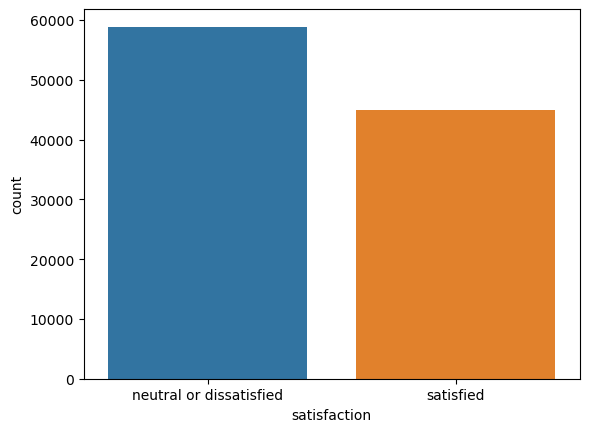

In [9]:
# Histogram of Passenger Satisfaction between "satisfied" and "neutral of dissatisfied"
sns.countplot(x='satisfaction',data=airlineData)

## MOLD DATA

##### Convert categorical data into readable data for machine learning model

Functions to convert individual data

In [10]:
# converts gender of passenger from String to integer
# male 1, female 0
def conv_gender_int(g):
    if g == "Male":
        return 1
    elif g == 'Female':
        return 0

# converts the type of passenger/customer from String to integer
# Loyal Customer 1 , disloyal Customer 0
def conv_ctype_int(c):
    if c == "Loyal Customer":
        return 1
    elif c == "disloyal Customer":
        return 0

# converts the type of travel for the passenger from String to integer
# business travel 1, personal travel 0
def conv_ttype_int(t):
    if t == "Business travel":
        return 1
    elif t == "Personal Travel":
        return 0

# converts the class that is booked by the passenger from String to integer
# business 2 , Eco plus 1 , Eco 0
def conv_class_int(l):
    if l == "Business":
        return 2 
    elif l == "Eco Plus":
        return 1
    elif l == "Eco":
        return 0
# converts satisfaction level of the passenger from String to integer
# satisfied 1, neutral or dissatisfied 0
def conv_satisfaction_int(s):
    if s == "satisfied":
        return 1
    elif s == "neutral or dissatisfied":
        return 0

Function to convert all data

In [11]:
# function to run all functions for converting catergorical data into integers
def conv_info(ci):
    # passenger info to be converted
    ci['Gender'] = ci['Gender'].apply(conv_gender_int)
    ci['Customer Type'] = ci['Customer Type'].apply(conv_ctype_int)
    ci['Type of Travel'] = ci['Type of Travel'].apply(conv_ttype_int)
    ci['Class'] = ci['Class'].apply(conv_class_int)
    ci['satisfaction'] = ci['satisfaction'].apply(conv_satisfaction_int)
    
    return ci

#### Convert data in CSV file from String to integer

In [12]:
airlineData = conv_info(airlineData)

In [13]:
# verify the top 5 rows were converted correctly
airlineData.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,satisfaction
0,1,1,13,0,1,0
1,1,0,25,1,2,0
2,0,1,26,1,2,1
3,0,1,25,1,2,0
4,1,1,61,1,2,1


In [14]:
# verify the bottom 5 rows were converted correctly
airlineData.tail(5)

,Gender,Customer Type,Age,Type of Travel,Class,satisfaction
103899,0,0,23,1,0,0
103900,1,1,49,1,2,1
103901,1,0,30,1,2,0
103902,0,0,22,1,0,0
103903,1,1,27,1,2,0


In [15]:
# verify no null values were created in the conversion process
airlineData.isnull().values.any()

False

## Checking for Correlation

In [16]:
# correlation of columns/variables
airlineData.corr()

,Gender,Customer Type,Age,Type of Travel,Class,satisfaction
Gender,1.000000,0.031732,0.008928,-0.006909,0.008253,0.012211
Customer Type,0.031732,1.000000,0.281674,-0.308333,0.105735,0.187638
Age,0.008928,0.281674,1.000000,0.048524,0.140565,0.137167
Type of Travel,-0.006909,-0.308333,0.048524,1.000000,0.545257,0.449000
Class,0.008253,0.105735,0.140565,0.545257,1.000000,0.494471
satisfaction,0.012211,0.187638,0.137167,0.449000,0.494471,1.000000


In [17]:
# function to plot correlation of columns/variables
def correlation_visual(airlineData, size= 9):
    corr_vis = airlineData.corr()  
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr_vis)   # create distinguishing color visual based on values of the columns/variable
    plt.xticks(range(len(corr_vis.columns)), corr_vis.columns)  # label categories on the x-axis
    plt.yticks(range(len(corr_vis.columns)), corr_vis.columns)  # label categories on the y-axis

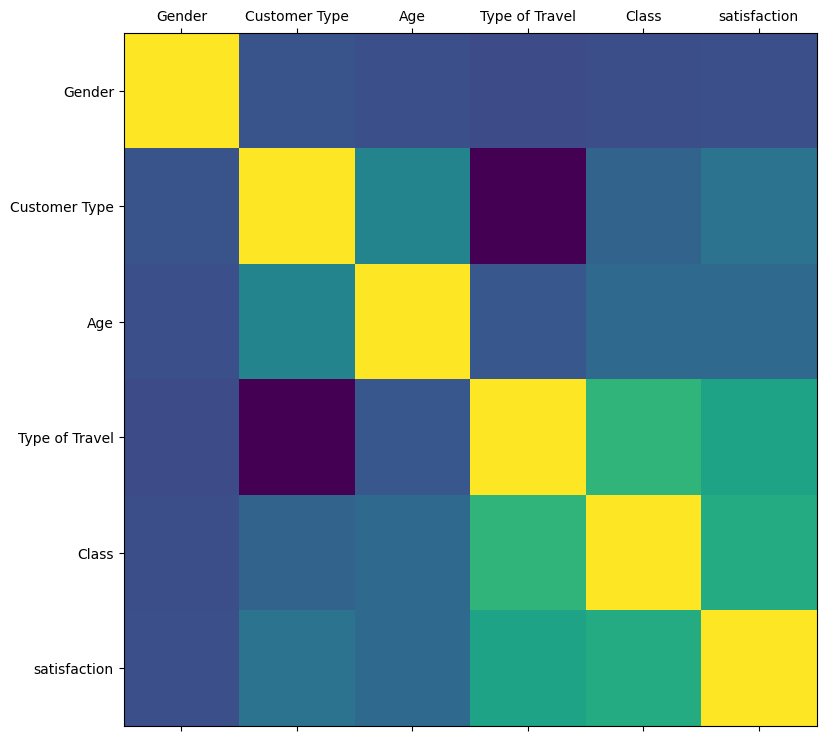

In [18]:
# run function to plot correlation visual
correlation_visual(airlineData)

### CORRELOGRAM

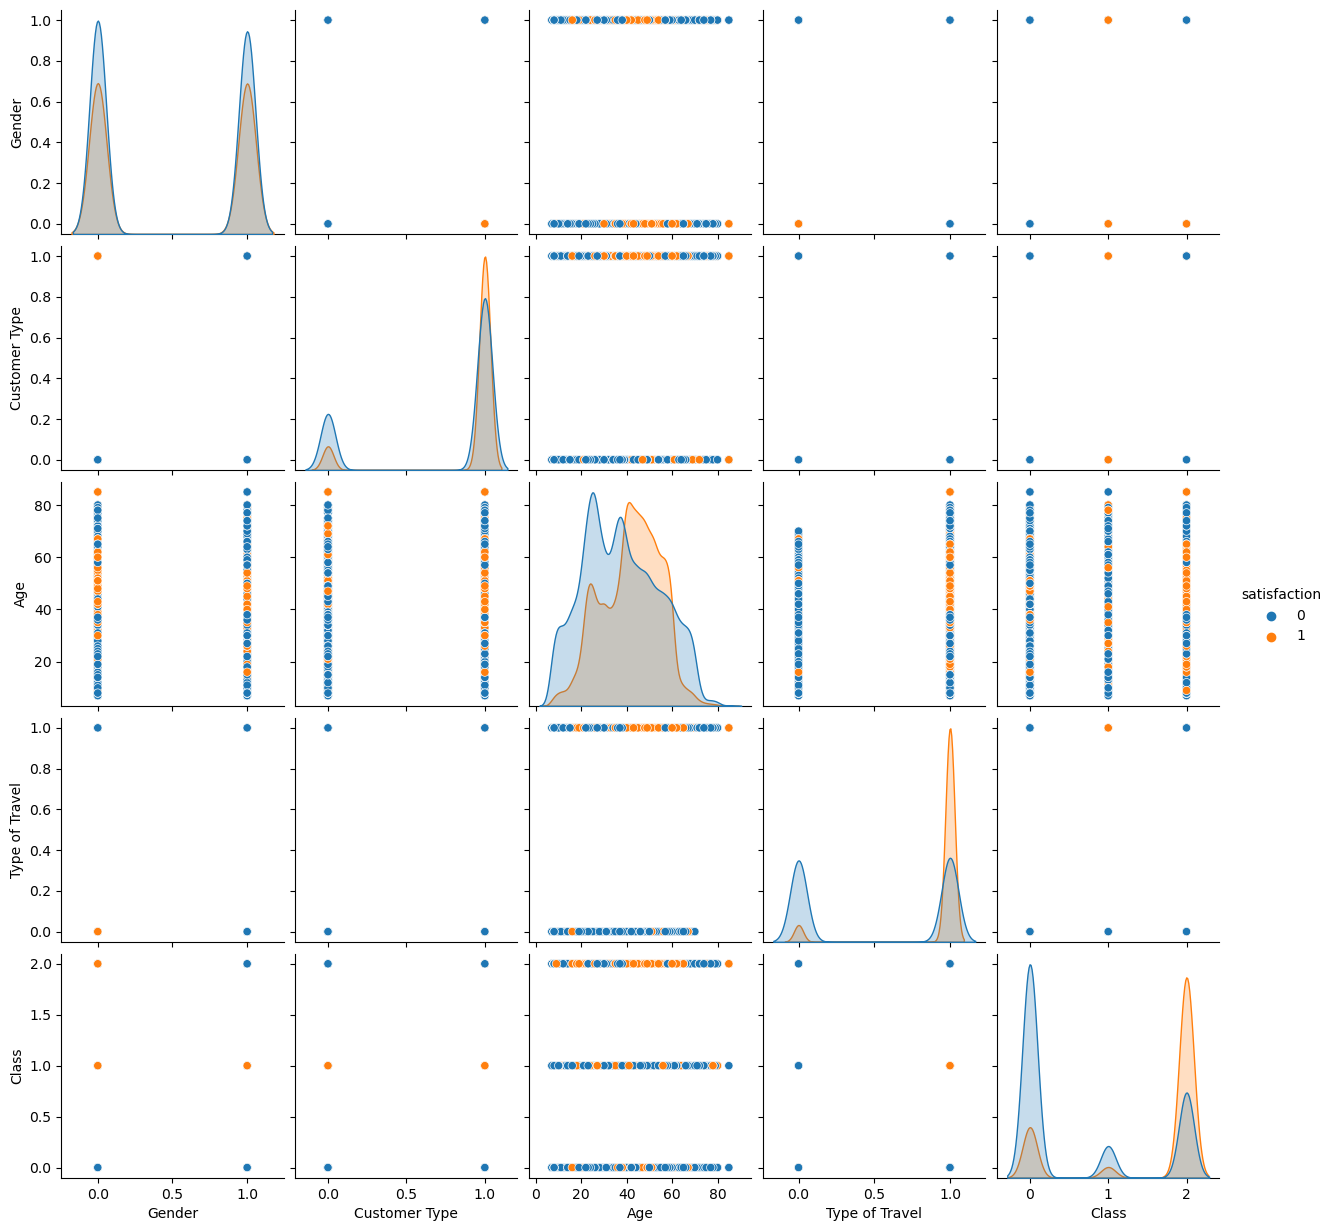

In [19]:
# visual showing satisfaction level agains each category/variable
sns.pairplot(airlineData, hue='satisfaction')
plt.show()

# LOGISTIC REGRESSION MODEL

#### Splitting the Passenger Data

In [20]:
# split passenger data between training and testing
from sklearn.model_selection import train_test_split

X = airlineData.iloc[:, :-1].values
y = airlineData.iloc[:, -1].values

# saving 25% of the data for testing logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, random_state= 0)

In [21]:
# verify y test data
print(y_test)

[1 0 0 ... 1 0 0]


#### Teaching Logistic Regression Model using the Data Set

In [22]:
# Logistic Regression Supervised Learning Model
from sklearn.linear_model import LogisticRegression

cl_m =LogisticRegression(random_state=0)
cl_m.fit(X_train, y_train)
cl_m_pred = cl_m.predict(X_test)


In [23]:
# Verification of Logistic Regression Model against the data set
# Check accuracy score and confuction matrix
from sklearn.metrics import accuracy_score, confusion_matrix

c_matrix = confusion_matrix (y_test, cl_m_pred)
print("Confusion Matrix \n" , c_matrix)
print("\nAccuracey Score of Logistice Regression Model: " , accuracy_score(y_test, cl_m_pred))

Confusion Matrix 
 [[12080  2654]
 [ 3001  8241]]

Accuracey Score of Logistice Regression Model:  0.7822990452725593


#### Manually Testing Logistic Regression Model

In [24]:
print("Satisfaction: ", cl_m.predict([[0,0,23,1,0]]))

Satisfaction:  [0]


In [25]:
print("Satisfaction: ", cl_m.predict([[1,1,49,1,2]]))

Satisfaction:  [1]


### Variable Reference Table

These are the dependent and independent variables used for predicting passenger satisfaction

| Column  | Description of Variable | Numeric Reference to Variable |
|--------------|-------------|--------|
| Gender | Passenger Gender | Male: 1 . Female: 2
| Customer Type | Passenger history with the airlines | Loyal Customer: 1 . Disloyal Customer: 0
| Age | Numeric age of passenger at the type of flight | Numeric age of passenger
| Type of Travel | Passenger reason for traveling | Business Travel: 1 . Personal Travel: 0
|Class | Passenger seating section of the airplane | Business: 2 . Eco Plus: 1 . Eco: 0
| Satisfaction |  Passenger satisfactory level for the flight | Satisfied: 1 . Neutral or Dissatisfied: 0



### Manually Testing Pasenger Information
1. Copy and Paste or type in:

print("Satisfaction: ", cl_m.predict([[Gender,Customer    Type,Age,Type of Travel, Class]]))

2. Replace each category in the brackets with a corresponding numeric value.


3. Run the selection to get Passenger Satisfaction Level
